## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [84]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols


df = pd.read_csv('kc_house_data.csv')
df.head(20) #Just my first import of the data and looking around at the first 20 rows. 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [85]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [86]:
df.describe() #Looking at some possible telling details. I'm thinking of changing waterfronts values to True and False just for readability.
#I think it is interesting that 75% of the homes have 4 bedrooms. It's possible homes with 4 bedrooms were more desirable to build for economic purposes: having more people in housing, increase of costs for potential profits, and better area efficiency. 
#I can see the outliers for some of the predictors that I would like to take out for regressing. 
#I would like to take out the outliers for bedrooms, bathrooms, sqft_living, sqft_above, sqft_living15, sqft_lot15


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [121]:
outlier_Data_Values = df.loc[:,['bedrooms','bathrooms','sqft_living','sqft_above','sqft_living15','sqft_lot15']]
outlier_Data_Values.sort_values(by = ['bedrooms'], axis =0, ascending = True)
df.drop(df['bedrooms'].idxmax()) #Just dropped outlier 33 bedroom home. 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [133]:
df = df[df['bathrooms'] < 7.5] #dropping the 4 homes that had 7.5 or higher bathrooms

In [134]:
df.sort_values(by = ['bathrooms'], axis =0, ascending = True) #Checking the distribution for bathrooms

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2259,3971701455,10/3/2014,273000.0,2,0.50,1180,7750,1.0,0.0,0.0,...,6,590,590.0,1945,0.0,98155,47.7690,-122.316,1380,8976
12029,2991000160,12/12/2014,312500.0,4,0.50,2300,5570,2.0,0.0,0.0,...,8,2300,?,1996,NaN,98092,47.3285,-122.168,1820,6371
11662,7987400316,8/14/2014,255000.0,1,0.50,880,1642,1.0,0.0,0.0,...,6,500,380.0,1910,0.0,98126,47.5732,-122.372,1410,2992
10413,7129800036,1/14/2015,109000.0,2,0.50,580,6900,1.0,0.0,0.0,...,5,580,0.0,1941,0.0,98118,47.5135,-122.262,1570,5040
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357
16326,6146600170,7/3/2014,100000.0,2,0.75,660,5240,1.0,0.0,0.0,...,4,660,0.0,1912,0.0,98032,47.3881,-122.234,850,5080
1969,2129700320,5/5/2015,250000.0,1,0.75,940,87120,1.0,0.0,0.0,...,6,940,0.0,1944,0.0,98019,47.7182,-121.956,1930,165528
1973,5101404170,11/13/2014,200000.0,1,0.75,680,9600,1.0,0.0,0.0,...,5,680,0.0,1947,NaN,98115,47.6964,-122.306,1580,6624
3801,7335400215,5/5/2015,95000.0,1,0.75,760,5746,1.0,0.0,0.0,...,5,760,0.0,1915,0.0,98002,47.3046,-122.215,970,6696
350,7325600160,6/4/2014,299000.0,1,0.75,560,12120,1.0,NaN,0.0,...,4,560,0.0,1967,0.0,98014,47.6750,-121.854,1300,19207


In [163]:

df1.sort_values(by = ['sqft_living'], axis =0, ascending = True)
#Where I saw how I could take out some outliers in sqft_living


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15367,2856101479,7/1/2014,276000.0,1,0.75,370,1801,1.0,0.0,0.0,...,5,370,0.0,1923,0.0,98117,47.6778,-122.389,1340,5000
860,1723049033,6/20/2014,245000.0,1,0.75,380,15000,1.0,0.0,0.0,...,5,380,0.0,1963,0.0,98168,47.4810,-122.323,1170,15000
21316,9266700190,5/11/2015,245000.0,1,1.00,390,2000,1.0,0.0,0.0,...,6,390,0.0,1920,0.0,98103,47.6938,-122.347,1340,5100
8614,6303400395,1/30/2015,325000.0,1,0.75,410,8636,1.0,0.0,0.0,...,4,410,0.0,1953,0.0,98146,47.5077,-122.357,1190,8636
11488,4322200105,3/31/2015,229050.0,1,1.00,420,3298,1.0,0.0,0.0,...,4,420,0.0,1949,0.0,98136,47.5375,-122.391,1460,4975
14452,7549801385,6/12/2014,280000.0,1,0.75,420,6720,1.0,0.0,0.0,...,5,420,0.0,1922,0.0,98108,47.5520,-122.311,1420,6720
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,NaN,0.0,...,4,430,0.0,1912,0.0,98014,47.6499,-121.909,1200,7500
1166,3523029041,10/9/2014,290000.0,2,0.75,440,8313,1.0,1.0,3.0,...,5,440,0.0,1943,0.0,98070,47.4339,-122.512,880,26289
18038,1352300580,11/14/2014,247000.0,1,1.00,460,4120,1.0,0.0,0.0,...,4,460,0.0,1937,0.0,98055,47.4868,-122.199,990,4120
15234,1320069249,10/20/2014,192500.0,1,1.00,470,63737,1.0,0.0,2.0,...,5,470,0.0,1924,0.0,98022,47.2163,-121.984,1350,46762


In [164]:
df11 = df[df['sqft_living'] < 9200]
df22 = df[df['sqft_living'] > 320]
df = pd.concat([df11, df22])
df.head() #Taking out outliers for sqft_living

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [169]:
df=df[df['sqft_above'] < 8000]
df.sort_values(by = ['sqft_above'], axis =0, ascending = True)
#took out the two 8000ft above places

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15367,2856101479,7/1/2014,276000.0,1,0.75,370,1801,1.0,0.0,0.0,...,5,370,0.0,1923,0.0,98117,47.6778,-122.389,1340,5000
15367,2856101479,7/1/2014,276000.0,1,0.75,370,1801,1.0,0.0,0.0,...,5,370,0.0,1923,0.0,98117,47.6778,-122.389,1340,5000
860,1723049033,6/20/2014,245000.0,1,0.75,380,15000,1.0,0.0,0.0,...,5,380,0.0,1963,0.0,98168,47.4810,-122.323,1170,15000
860,1723049033,6/20/2014,245000.0,1,0.75,380,15000,1.0,0.0,0.0,...,5,380,0.0,1963,0.0,98168,47.4810,-122.323,1170,15000
21316,9266700190,5/11/2015,245000.0,1,1.00,390,2000,1.0,0.0,0.0,...,6,390,0.0,1920,0.0,98103,47.6938,-122.347,1340,5100
21316,9266700190,5/11/2015,245000.0,1,1.00,390,2000,1.0,0.0,0.0,...,6,390,0.0,1920,0.0,98103,47.6938,-122.347,1340,5100
8614,6303400395,1/30/2015,325000.0,1,0.75,410,8636,1.0,0.0,0.0,...,4,410,0.0,1953,0.0,98146,47.5077,-122.357,1190,8636
8614,6303400395,1/30/2015,325000.0,1,0.75,410,8636,1.0,0.0,0.0,...,4,410,0.0,1953,0.0,98146,47.5077,-122.357,1190,8636
14452,7549801385,6/12/2014,280000.0,1,0.75,420,6720,1.0,0.0,0.0,...,5,420,0.0,1922,0.0,98108,47.5520,-122.311,1420,6720
11488,4322200105,3/31/2015,229050.0,1,1.00,420,3298,1.0,0.0,0.0,...,4,420,0.0,1949,0.0,98136,47.5375,-122.391,1460,4975


In [170]:
df.sort_values(by = ['sqft_living15'], axis =0, ascending = True) #looks like a fair distribution

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13428,2722059275,5/12/2015,536000.0,3,2.75,2290,34548,2.0,0.0,3.0,...,7,2290,0.0,1984,0.0,98042,47.3691,-122.163,399,275299
13428,2722059275,5/12/2015,536000.0,3,2.75,2290,34548,2.0,0.0,3.0,...,7,2290,0.0,1984,0.0,98042,47.3691,-122.163,399,275299
17272,9421500130,6/16/2014,378000.0,5,2.50,2760,8015,1.0,0.0,0.0,...,8,1600,1160.0,1960,0.0,98125,47.7255,-122.297,460,18000
17272,9421500130,6/16/2014,378000.0,5,2.50,2760,8015,1.0,0.0,0.0,...,8,1600,1160.0,1960,0.0,98125,47.7255,-122.297,460,18000
12094,3822200036,6/24/2014,257500.0,2,2.00,1180,9265,1.0,0.0,0.0,...,7,1180,0.0,1940,NaN,98125,47.7252,-122.297,460,18000
12094,3822200036,6/24/2014,257500.0,2,2.00,1180,9265,1.0,0.0,0.0,...,7,1180,0.0,1940,NaN,98125,47.7252,-122.297,460,18000
17873,8150100265,11/18/2014,255000.0,2,1.00,620,4760,1.0,0.0,0.0,...,6,620,0.0,1941,0.0,98126,47.5292,-122.376,620,4760
1918,8150100240,2/18/2015,265000.0,2,1.00,620,4760,1.0,0.0,0.0,...,6,620,0.0,1941,0.0,98126,47.5286,-122.376,620,4760
1918,8150100240,2/18/2015,265000.0,2,1.00,620,4760,1.0,0.0,0.0,...,6,620,0.0,1941,0.0,98126,47.5286,-122.376,620,4760
17873,8150100265,11/18/2014,255000.0,2,1.00,620,4760,1.0,0.0,0.0,...,6,620,0.0,1941,0.0,98126,47.5292,-122.376,620,4760


In [182]:
df29.sqft_lot15.min()

1003

In [191]:
#the max outliers in sqft_lot15 were 4 rows that had 800,000ft
#Also taking out values under 1000
# df18 = df[df['sqft_lot15'] < 800000]
# df29 = df[df['sqft_lot15'] > 1000]
# df33=pd.concat([df18, df29])
# df33.sort_values(by = ['sqft_lot15'], axis =0, ascending = True)
df = df33[df33['sqft_lot15'] > 1000].sort_values(by = ['sqft_lot15'], axis =0, ascending = True)
df = df44[df44['sqft_lot15'] < 800000].sort_values(by = ['sqft_lot15'], axis =0, ascending = True)
df55.sqft_lot15.max()

560617

In [106]:
#Create a bar graph with percents as y, number of bedrooms for x, to show interesting finding from above. 


In [107]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [ ]:
df.shape #Checking out the original matrix dimensions to understand size.

In [148]:
df.corr() #Checking out if any of my original assumptions about the data set could be supported by the correlation. Realized that lat is far more correlated with price than I assumed.


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.018816,0.001460,0.005257,-0.012542,-0.131756,0.018694,-0.004178,0.011361,-0.023869,0.007863,-0.011105,0.021729,-0.012235,-0.008117,-0.001796,0.020764,-0.002908,-0.138457
price,-0.018816,1.000000,0.308701,0.522714,0.699657,0.089300,0.258070,0.281525,0.394477,0.036472,0.671213,0.602199,0.055732,0.127248,-0.053996,0.310759,0.022898,0.588937,0.081892
bedrooms,0.001460,0.308701,1.000000,0.512606,0.578426,0.031243,0.177140,-0.002319,0.076823,0.026794,0.355873,0.478082,0.155668,0.017937,-0.154572,-0.010307,0.132280,0.392992,0.029379
bathrooms,0.005257,0.522714,0.512606,1.000000,0.753866,0.086235,0.503028,0.067805,0.183040,-0.126812,0.665798,0.683877,0.509631,0.049595,-0.205997,0.023700,0.226039,0.569818,0.085976
sqft_living,-0.012542,0.699657,0.578426,0.753866,1.000000,0.170670,0.353932,0.111394,0.278618,-0.059716,0.763813,0.875187,0.320826,0.053587,-0.201246,0.051653,0.242801,0.758042,0.181389
sqft_lot,-0.131756,0.089300,0.031243,0.086235,0.170670,1.000000,-0.005770,0.023209,0.073730,-0.008641,0.113646,0.182075,0.052723,0.004528,-0.129572,-0.085884,0.229992,0.143580,0.717518
floors,0.018694,0.258070,0.177140,0.503028,0.353932,-0.005770,1.000000,0.021920,0.027333,-0.264110,0.458477,0.524589,0.489394,0.003093,-0.059563,0.049079,0.125884,0.279532,-0.011733
waterfront,-0.004178,0.281525,-0.002319,0.067805,0.111394,0.023209,0.021920,1.000000,0.407374,0.017639,0.087564,0.076049,-0.026080,0.087331,0.031061,-0.012763,-0.039868,0.088999,0.032086
view,0.011361,0.394477,0.076823,0.183040,0.278618,0.073730,0.027333,0.407374,1.000000,0.045929,0.247741,0.162015,-0.054742,0.100342,0.085619,0.005775,-0.078219,0.277921,0.071580
condition,-0.023869,0.036472,0.026794,-0.126812,-0.059716,-0.008641,-0.264110,0.017639,0.045929,1.000000,-0.147059,-0.159518,-0.361497,-0.062166,0.002871,-0.015080,-0.105835,-0.093075,-0.002882


In [147]:

abs(df.corr()) > 0.75 #Shows that none of the columns, except price itself, is highly correlated with price.


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


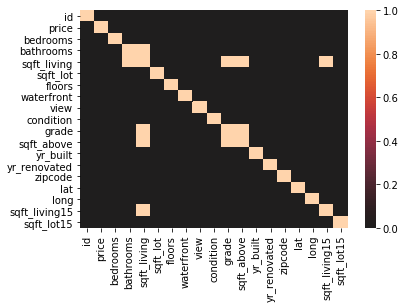

In [149]:
sns.heatmap(abs(df.corr()) > 0.75,center=0)
#Orange blocks represent .75 correlation or greater, which our heatmap clearly shows which predictors will cause multicollinearity and should be removed. 

In [150]:
y = 'price'
x =  ['date','bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']
predictors = '+'.join(x)
formula = y + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()
#First OLS only excluding 'id'. 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     65.09
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        14:13:37   Log-Likelihood:            -2.1349e+05
No. Observations:               15758   AIC:                         4.283e+05
Df Residuals:                   15092   BIC:                         4.334e+05
Df Model:                         665                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                4.188e+06   3.33e+06      1.259      0.208   -2.33e+06    1.07e+07
date[T.1/12/2015]        1.175e+05   1.92e+05      0.611      0.541   -2.59e+05    4.94e+05
date[T.1/13/2015]        1.089e+05   1.92e+05      0.567      0.571   -2.68e+05    4.86e+05
date[T.1/14/2015]        5.016e+04   1.91e+05      0.262      0.793   -3.25e+05    4.25e+05
date[T.1/15/2015]        1.053e+05   1.92e+05      0.549      0.583   -2.71e+05    4.82e+05
date[T.1/16/2015]        6.495e+04   1.92e+05      0.339      0.735   -3.11e+05    4.41e+05
date[T.1/17/2015]        7.981e+04   2.68e+05      0.298      0.766   -4.46e+05    6.05e+05
date[T.1/19/2015]        7010.5855   2.02e+05      0.035      0.972    -3.9e+05    4.04e+05
date[T.1/2/2015]         1.066e+05   1.92e+05      0.555      0.579    -2.7e+05    4.83e+05
date[T.1/20/2015]        1.261e+05   1.92e+05      0.656      0.512    -2.5e+05    5.03e+05
date[T.1/21/2015]         1.25e+05   1.91e+05      0.654      0.513    -2.5e+05       5e+05
date[T.1/22/2015]         1.07e+05   1.92e+05      0.557      0.577   -2.69e+05    4.83e+05
date[T.1/23/2015]        1.266e+05   1.92e+05      0.661      0.509   -2.49e+05    5.02e+05
date[T.1/24/2015]       -1.076e+05   2.33e+05     -0.462      0.644   -5.64e+05    3.48e+05
date[T.1/25/2015]        1.127e+05   2.32e+05      0.485      0.628   -3.43e+05    5.68e+05
date[T.1/26/2015]        5.176e+04   1.92e+05      0.270      0.787   -3.24e+05    4.28e+05
date[T.1/27/2015]        1.076e+05   1.92e+05      0.561      0.575   -2.68e+05    4.83e+05
date[T.1/28/2015]        1.065e+05   1.91e+05      0.557      0.578   -2.68e+05    4.81e+05
date[T.1/29/2015]         1.24e+05   1.92e+05      0.645      0.519   -2.53e+05    5.01e+05
date[T.1/30/2015]        2.451e+05   1.93e+05      1.270      0.204   -1.33e+05    6.23e+05
date[T.1/31/2015]           0.0019      0.000      4.233      0.000       0.001       0.003
date[T.1/5/2015]         1.044e+05   1.91e+05      0.546      0.585   -2.71e+05     4.8e+05
date[T.1/6/2015]         1.157e+05   1.92e+05      0.601      0.548   -2.62e+05    4.93e+05
date[T.1/7/2015]         1.636e+05   1.92e+05      0.852      0.394   -2.13e+05     5.4e+05
date[T.1/8/2015]         7.812e+04   1.92e+05      0.407      0.684   -2.98e+05    4.54e+05
date[T.1/9/2015]         1.538e+05   1.93e+05      0.797      0.425   -2.24e+05    5.32e+05
date[T.10/1/2014]        1.395e+05   1.91e+05      0.732      0.464   -2.34e+05    5.13e+05
date[T.10/10/2014]       9.074e+04   1.91e+05      0.476      0.634   -2.83e+05    4.65e+05
date[T.10/11/2014]       1.131e+06   2.32e+05      4.877      0.000    6.76e+05    1.59e+06
date[T.10/12/2014]       1.552e+05   2.32e+05      0.670      0.503   -2.99e+05    6.09e+05
date[T.10/13/2014]       6.804e+04   1.92e+05  

In [151]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')